In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
avengers = pd.read_csv("./charcters_stats.csv")

avengers.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
avengers.sort_values('Total', ascending=False)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
...,...,...,...,...,...,...,...,...,...
462,Renata Soliz,good,1,1,1,1,0,1,5
137,Captain Mar-vell,good,1,1,1,1,0,1,5
136,Captain Epic,good,1,1,1,1,0,1,5
466,Ripcord,good,1,1,1,1,0,1,5


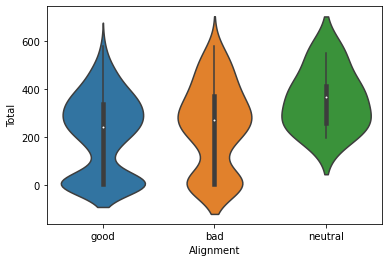

In [4]:
sns.violinplot(data=avengers, x='Alignment', y='Total')

plt.show()

In [5]:
# avengers = avengers[avengers.Total != 5]

In [6]:
categories = list(avengers)[2:8]
categories = [*categories, categories[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=len(categories))

In [7]:
Alignment_data = avengers.loc[:, 'Alignment':'Combat'].groupby('Alignment').mean()
Alignment_data['temp'] = Alignment_data['Intelligence']

Alignment_data

,Intelligence,Strength,Speed,Durability,Power,Combat,temp
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,50.018182
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,41.995370
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,60.909091


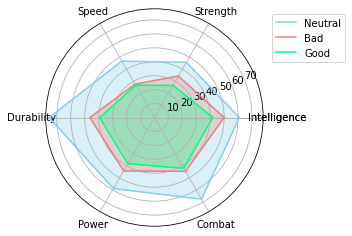

In [8]:
ax = plt.subplot(polar=True)

plt.xticks(label_loc, labels=categories)

plt.plot(label_loc, Alignment_data.loc['neutral'], label='Neutral', color='skyblue')
plt.fill(label_loc, Alignment_data.loc['neutral'], color='skyblue', alpha=0.3)

plt.plot(label_loc, Alignment_data.loc['bad'], label='Bad', color='lightcoral')
plt.fill(label_loc, Alignment_data.loc['bad'], color='lightcoral', alpha=0.3)

plt.plot(label_loc, Alignment_data.loc['good'], label='Good', color='springgreen')
plt.fill(label_loc, Alignment_data.loc['good'], color='springgreen', alpha=0.3)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

In [9]:
marvel = pd.read_csv('./marvel-wikia-data.csv')

marvel.head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [10]:
dc = pd.read_csv('./dc-wikia-data.csv')

dc.head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [11]:
avengers = avengers.assign(Division='Unknown')

for i in range(len(avengers)):
    for j in range(len(marvel)):
        if avengers.loc[i, 'Name'].lower() in marvel.loc[j, 'name'].lower():
            avengers.loc[i, 'Division'] = 'Marvel'
            break
    if avengers.loc[i, 'Division'] != 'Unknown':
        continue
    for j in range(len(dc)):
        if avengers.loc[i, 'Name'].lower() in dc.loc[j, 'name'].lower():
            avengers.loc[i, 'Division'] = 'DC'
            break

avengers

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Division
0,3-D Man,good,50,31,43,32,25,52,233,Unknown
1,A-Bomb,good,38,100,17,80,17,64,316,Unknown
2,Abe Sapien,good,88,14,35,42,35,85,299,Unknown
3,Abin Sur,good,50,90,53,64,84,65,406,DC
4,Abomination,bad,63,80,53,90,55,95,436,Marvel
...,...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164,Unknown
607,Yellowjacket II,good,50,10,35,28,31,28,182,Unknown
608,Ymir,good,50,100,27,100,83,28,388,Marvel
609,Zatanna,good,75,10,23,28,100,56,292,DC


In [12]:
categories = list(avengers)[2:8]
categories = [*categories, categories[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=len(categories))

Division_data = avengers[[*list(avengers)[2:8], 'Division']].groupby('Division').mean()
Division_data['temp'] = Division_data['Intelligence']

Division_data

,Intelligence,Strength,Speed,Durability,Power,Combat,temp
Division,,,,,,,
DC,59.593220,44.406780,39.542373,50.237288,54.762712,56.559322,59.593220
Marvel,49.905579,34.991416,31.536481,50.334764,47.587983,50.223176,49.905579
Unknown,37.764890,21.934169,21.952978,34.081505,32.326019,35.611285,37.764890


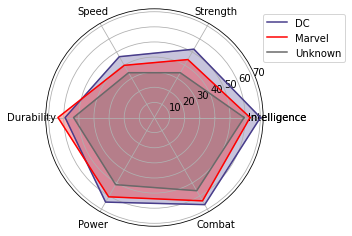

In [18]:
ax = plt.subplot(polar=True)

plt.xticks(label_loc, labels=categories)

plt.plot(label_loc, Division_data.loc['DC'], label='DC', color='darkslateblue')
plt.fill(label_loc, Division_data.loc['DC'], color='darkslateblue', alpha=0.3)

plt.plot(label_loc, Division_data.loc['Marvel'], label='Marvel', color='red')
plt.fill(label_loc, Division_data.loc['Marvel'], color='red', alpha=0.3)

plt.plot(label_loc, Division_data.loc['Unknown'], label='Unknown', color='dimgrey')
plt.fill(label_loc, Division_data.loc['Unknown'], color='dimgrey', alpha=0.3)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

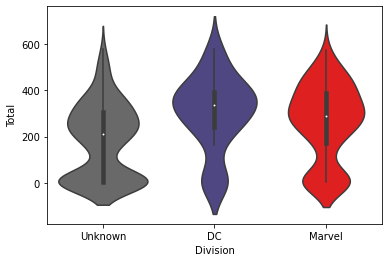

In [14]:
palette = {'Unknown':'dimgrey', 'DC':'darkslateblue', 'Marvel':'red'}
sns.violinplot(data=avengers, x='Division', y='Total', palette=palette)

plt.show()

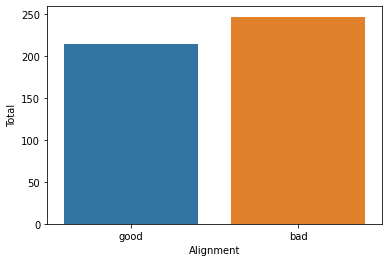

In [27]:
sns.barplot(data=avengers[avengers.Alignment != 'neutral'], x='Alignment', y='Total', ci=None)

plt.show()

In [42]:
avengers.groupby('Alignment').mean()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


In [43]:
for i in range(len(avengers)):
    if avengers.loc[i, 'Alignment'] == 'good' or avengers.loc[i, 'Alignment'] == 'neutral':
        avengers.loc[i, 'Alignment'] = 'good + neutral'

avengers.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good + neutral,50,31,43,32,25,52,233
1,A-Bomb,good + neutral,38,100,17,80,17,64,316
2,Abe Sapien,good + neutral,88,14,35,42,35,85,299
3,Abin Sur,good + neutral,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


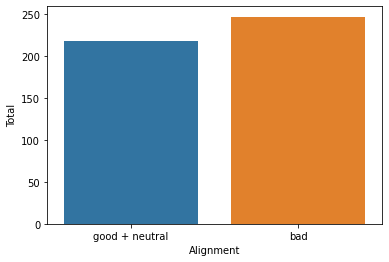

In [44]:
sns.barplot(data=avengers, x='Alignment', y='Total', ci=None)

plt.show()

In [45]:
avengers.groupby('Alignment').mean()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good + neutral,42.465011,27.112867,27.182844,40.194131,38.801354,42.720090,218.476298


In [46]:
good_mean = avengers.Total[avengers.Alignment == 'good'].mean()
good_neutral_mean = avengers.Total[avengers.Alignment == 'good'].mean()
y = [good_mean, good_neutral_mean, bad_mean, neutral_mean]
sns.barplot(x=['good', 'good + neutral', 'bad', 'neutral'], y=y)

NameError: name 'good' is not defined

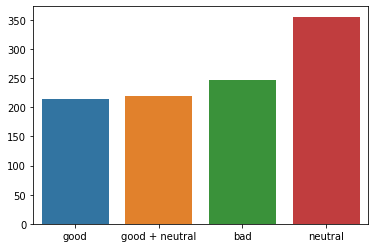

In [71]:
alliance_mean = avengers[avengers.Alignment != 'bad'].Total.mean()
data = avengers.groupby('Alignment').Total.mean()

y = [data.good, alliance_mean, data.bad, data.neutral]
sns.barplot(x=['good', 'good + neutral', 'bad', 'neutral'], y=y, ci=None)

plt.show()

In [62]:
avengers.groupby('Alignment').count()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,,
bad,165,165,165,165,165,165,165,165
good,432,432,432,432,432,432,432,432
neutral,11,11,11,11,11,11,11,11


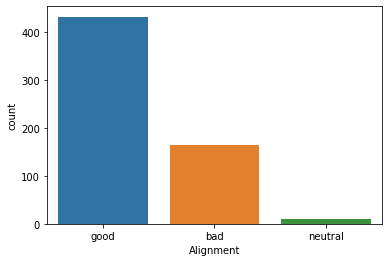

In [65]:
sns.countplot(data=avengers, x='Alignment')

plt.show()

In [68]:
Alignment_data = avengers.groupby('Alignment').Total.mean()

Alignment_data.good

214.99074074074073